In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

(array([1.313e+03, 2.710e+03, 2.647e+03, 1.878e+03, 9.270e+02, 3.660e+02,
        1.240e+02, 2.500e+01, 6.000e+00, 3.000e+00, 1.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

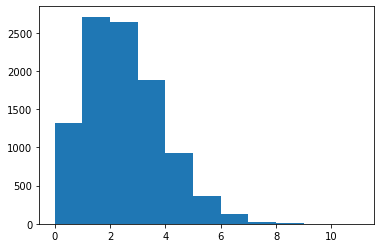

In [174]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up window 
# follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and answer these questions concerning the probability of cars 
# waiting at the drive-up window.

n = 10000

x = stats.poisson(2).rvs(n)

plt.hist(x, bins=range(0, 12))


In [175]:
# What is the probability that no cars drive up in the noon hour?

stats.poisson(2).pmf(0)

0.1353352832366127

In [176]:
# What is the probability that 3 or more cars come through the drive through?

(stats.poisson(2).sf(2))

0.32332358381693654

In [177]:
# How likely is it that the drive through gets at least 1 car?

stats.poisson(2).sf(0)

0.8646647167633873

In [178]:
# Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following:

In [179]:
# What grade point average is required to be in the top 5% of the graduating class?

gpa = stats.norm(3, .3)

gpa.isf(.05)

3.4934560880854417

In [180]:
# What GPA constitutes the bottom 15% of the class?

gpa = stats.norm(3, .3)

gpa.ppf(.15)

2.689069983151863

In [181]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 

values_under_third_decile = gpa.ppf(.2)

values_above_third_decile = gpa.ppf(.3)

print(f'The range of the third decile is {values_under_third_decile} to {values_above_third_decile}')


The range of the third decile is 2.7475136299281258 to 2.842679846187588


In [182]:
# Would a student with a 2.8 grade point average qualify for this scholarship?

# Yes bc they fall within the range of the third decile.

In [183]:
# If I have a GPA of 3.5, what percentile am I in?

gpa.cdf(3.5)

0.9522096477271853

In [184]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?

stats.binom(4326, .02).sf(96)

0.1397582363130086

In [185]:
# You are working on some statistics homework consisting of 100 questions 
# where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.
# What is the probability that at least one of your first 60 answers is correct?

stats.binom(60, 1/101).sf(0)

0.44955038406224

In [186]:
# The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 

stats.binom(59, .03).sf(0)


0.8342199288437355

In [187]:
# How likely is it that it goes two days without getting cleaned up? 

1 - (stats.binom(118, .03).sf(0))


0.02748303199257618

In [188]:
# All week?

1 - (stats.binom(413, .03).sf(0))

3.4413294569546338e-06

In [189]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line 
# when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

stats.norm(15,3) 



In [211]:
# Connect to the employees database 

# importing host, username, and password from external file
from env import host, username, password
# setting variable equal to string that will combine the host, username, password, and db for our URL
url = (f'mysql+pymysql://{username}:{password}@{host}/employees')

# PART 1 - Connecting to employees database

# using read_sql to run query and url to connect to database
employees = pd.read_sql('SELECT * FROM employees', empurl)

# converting to Dataframe
emps = pd.DataFrame(employees)

emps

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [213]:
# Find the average salary of current employees

# PART 2 - Connecting to salaries table

# using read_sql to run query and url to connect to database
salaries = pd.read_sql('SELECT * FROM salaries where to_date > curdate()', url)

# converting to dataframe
sals = pd.DataFrame(salaries)

sals

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [214]:
# Find the average salary of current employees

# PART 3 - Merging databases 

empsals = pd.merge(emps, sals, left_on = 'emp_no', right_on='emp_no')

empsals

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


In [247]:
# Find the average salary of current employees

avg_sal = empsals.salary.mean()

avg_sal

72012.23585730705

In [250]:
# Along with the standard deviation. 

sdev_sal = empsals.salary.std()

sdev_sal

17309.99538025198

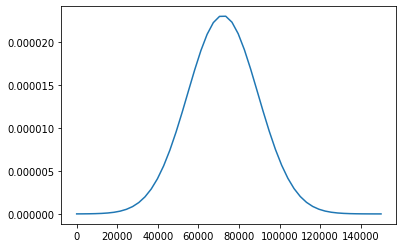

In [251]:
# Model the distribution of employees salaries with a normal distribution and answer the following questions:

x = np.linspace(1, 150000)
y = stats.norm(avg_sal, sdev_sal).pdf(x)

plt.plot(x, y)

In [252]:
# What percent of employees earn less than 60,000?

stats.norm(avg_sal, sdev_sal).cdf(60000)

# len(empsals[empsals.salary <= 60000]) / len(empsals) off by 3%?

0.24385742480214423

In [254]:
# What percent of employees earn more than 95,000?

stats.norm(avg_sal, sdev_sal).sf(95000)

# off by 1% | len(empsals[empsals.salary > 95000]) / len(empsals) 

0.09208819199804053

In [ ]:
# What percent of employees earn between 65,000 and 80,000?




In [ ]:
# What do the top 5% of employees make?

0.1086272092752078

In [164]:
die_distribution = stats.randint(1, 101)

n = 10_000

x = die_distribution.rvs(n)

die_distribution.isf(20/100)


80.0

In [165]:
die_distribution.ppf(20/100)

20.0